<h2 style="color:purple" align="Center" >Outlier Removal Using Z Score</h2>

#### Z-Score (Standard Score)
| **Attribute**      | **Details**                                                                                                                               |
| ------------------ | ----------------------------------------------------------------------------------------------------------------------------------------- |
| **Definition**     | A Z-score indicates how many standard deviations a data point is from the mean.                                                           |
| **Formula**        | $Z = \frac{X - \mu}{\sigma}$ <br> Where:<br>• $X$ = observed value <br>• $\mu$ = mean <br>• $\sigma$ = standard deviation                 |
| **Purpose**        | To standardize data, detect outliers, and perform comparative analysis across different distributions.                                    |
| **Range**          | Can be positive or negative. Values beyond ±2 are often considered unusual; ±3 or more may indicate outliers.                             |
| **Interpretation** | <ul><li>$Z = 0$: Value is exactly at the mean</li><li>$Z > 0$: Value is above the mean</li><li>$Z < 0$: Value is below the mean</li></ul> |
| **Use Cases**      | <ul><li>Outlier detection</li><li>Comparing scores across datasets</li><li>Standardizing data before ML modeling</li></ul>                |
| **Assumptions**    | Normality is typically assumed for interpretation, though not required for calculation.                                                   |

### Example
Suppose:

Mean salary (
𝜇
μ) = ₹50,000

Standard deviation (
𝜎
σ) = ₹5,000

An individual earns ₹60,000

Z-score Calculation:

𝑍
=
60
,
000
−
50
,
000
5
,
000
=
10
,
000
5
,
000
=
2
Z= 
5,000
60,000−50,000
​
 = 
5,000
10,000
​
 =2
📈 Interpretation: The individual's salary is 2 standard deviations above the mean.

### 🧠 Interview Q&A on Z-Score
| **Question**                                       | **Answer**                                                                                                                        |
| -------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **Q1:** What is a Z-score used for?                | To measure the relative position of a value within a distribution, especially for identifying outliers or standardizing features. |
| **Q2:** Can Z-scores be used for non-normal data?  | Yes, they can be computed, but interpretation (e.g., outlier detection) is most meaningful under a normal distribution.           |
| **Q3:** What does a Z-score of -3 imply?           | The value is 3 standard deviations below the mean, which is typically considered a significant outlier.                           |
| **Q4:** How is Z-score useful in machine learning? | It’s used in feature scaling (standardization), outlier treatment, and data normalization processes.                              |


In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("heights_with_outliers.csv")
df.head(5)

,name,height
0,Aarav,5.45
1,Deepika,8.20
2,Abhishek,5.65
3,Sneha,5.52
4,Kriti,5.69


In [3]:
df.describe()

,height
count,1000.000000
mean,5.611180
std,0.372654
min,3.200000
25%,5.350000
50%,5.625000
75%,5.852500
max,9.400000


You can see above that the minimum height is 3.2 and max is 9.4 feet. These seem like outliers because a person with a height 9.4 ft sounds like a data error

In [4]:
mean = df.height.mean()
std = df.height.std()

mean, std

(np.float64(5.61118), np.float64(0.37265356335110805))

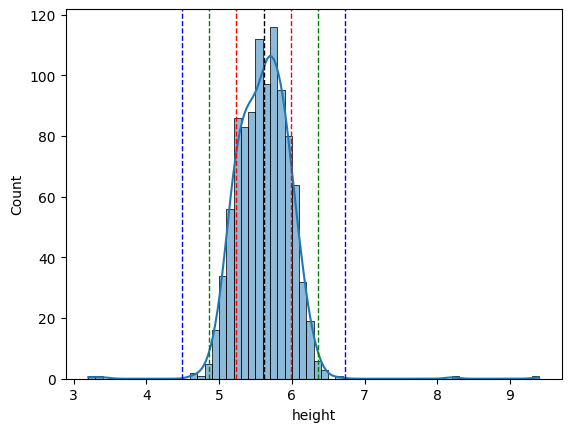

In [12]:
sns.histplot(df.height, kde=True)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)

# one stadard deviation
plt.axvline(mean + std, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean - std, color='r', linestyle='dashed', linewidth=1)

# two standard deviation
plt.axvline(mean + 2*std, color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean - 2*std, color='g', linestyle='dashed', linewidth=1)

# three standard deviation
plt.axvline(mean + 3*std, color='b', linestyle='dashed', linewidth=1)
plt.axvline(mean - 3*std, color='b', linestyle='dashed', linewidth=1)

In [16]:
df['z_score'] = (df['height']-mean)/std
df.head()

,name,height,z_score
0,Aarav,5.45,-0.432520
1,Deepika,8.20,6.946988
2,Abhishek,5.65,0.104172
3,Sneha,5.52,-0.244678
4,Kriti,5.69,0.211510


In [7]:
# For Aarav
(5.45-5.6111)/0.37265

-0.43230913726016434

Let's print all the outliers now using lower and upper boundries

In [17]:
df[(df.z_score<-3)|(df.z_score>3)]

,name,height,z_score
1,Deepika,8.2,6.946988
16,Tanvi,3.2,-6.470299
57,Priya,3.4,-5.933608
76,Aarav,9.4,10.167137


In [18]:
df_no_outliers = df[(df.z_score>-3)&(df.z_score<3)]
df_no_outliers.shape

(996, 3)

In [10]:
df_no_outliers.describe()

,height,z_score
count,996.000000,996.000000
mean,5.609418,-0.004729
std,0.327881,0.879855
min,4.650000,-2.579286
25%,5.357500,-0.680739
50%,5.625000,0.037085
75%,5.850000,0.640863
max,6.630000,2.733960


With outliers removed, you can see above that the min height is now 4.65 and max is 6.63 which seems reasonable

<Axes: xlabel='height', ylabel='Count'>

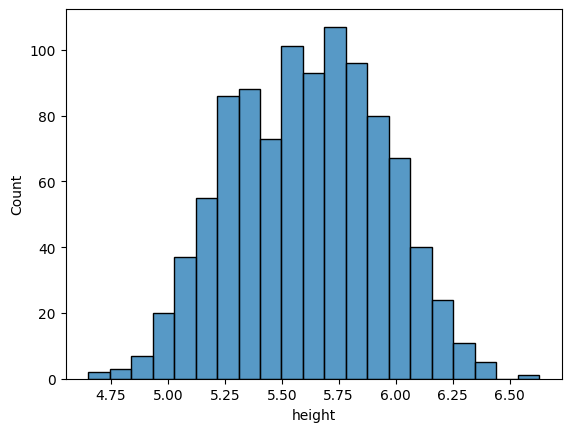

In [11]:
sns.histplot(df_no_outliers.height)

Outliers are now gone and the histogram looks normal. It is a standard practice in the industry to use +/-3 Z score (which is same as plus or minus 3 standard deviation) as a criteria for outlier removal